<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/5%EC%9E%A5~9%EC%9E%A5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B3%BC%20%EC%97%AC%EB%9F%AC%20%EA%B8%B0%EC%88%A0%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 05 장 로지스틱 회귀

05장 로지스틱 회귀 logistic regression는 '참', '거짓'을 구분하는 과정이며 이 부분은 이전에 했던 'Deep Learning for Scratch' [스터디](https://github.com/tirals88/Deep-Learning-from-Scratch/blob/06a51972011ef6082c252b0a5c9b96c9f0cd382b/1%EA%B6%8C_2%EC%9E%A5_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0_+_3%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D(3%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B9%8C%EC%A7%80).ipynb)와 같이 보았다.

활성화 함수의 한 종류로서 계단 함수는 임계치를 기준으로 참과 거짓을 나눈다.</br>그리고 활성화 함수의 또 다른 예시로 시그모이드 Sigmoid 함수가 있다.

이 둘의 차이로는 **'매끄러움'**이 있다. 시그모이드 함수는 연속적인 값을 출력하여 미분에 용이하다.

또 다른 예시로 ReLU 함수는 임계치를 넘으면 그대로 출력을 하고, 넘지 못하면 0을 출력한다.


시그모이드 함수는 $$y = \frac{1}{1+e^{-(ax+b)}}$$ 로 표현될 수 있으며 결국 선형 회귀와 마찬가지로 $a 와 b$를 최적화 하는 것이다.

기울기 $a$는 시그모이드 함수의 경사를, $b$는 함수의 좌우 이동에 관여한다.

시그모이드 함수의 $a$에 대한 변화량(편미분)은 $log{x}$ 의 꼴을, 오차는 반대로 $-log{x}$의 꼴을 보인다.

그리고 오차의 $b$에 대한 변화량은 이차곡선 꼴을 보인다.

정답은 1과 0 두 가지가 있을 수 있고, 정답이 1일 때, 예측 값이 0에 가까워지면 오차가 커지게 된다.</br>이러한 성질을 가지고 있는 함수가 로그이며 정답이 1일 때와 0일 때의 오차를 아래의 식으로 동시에 표현할 수 있다.

$$-(y_{data}log{h} + (1-y_{data})log(1-h))$$

정답이 1일 때 두 번째 항의 값이 0이 되고 반대로 0일 때는 첫 번째 항의 값이 0이 되어 없어진다.

$h$에는 시그모이드 함수가 들어가며, 시그모이드 함수의 편미분은 아래와 같다.

$$\frac{\partial y}{\partial a} = -\frac{-xe^{-(ax+b)}}{(1 + e^{-(ax+b)})^2} = \frac{x}{1+e^{-(ax+b)}}(1-\frac{1}{1+e^{-(ax+b)}}) = x(sig(ax+b))(1-sig(ax+b))$$

$$\frac{\partial y}{\partial b} = -\frac{-e^{-(ax+b)}}{(1 + e^{-(ax+b)})^2} = \frac{1}{1+e^{-(ax+b)}}(1-\frac{1}{1+e^{-(ax+b)}}) = (sig(ax+b))(1-sig(ax+b))$$

04장 다중선형회귀에서는 오차의 값이 양수와 음수가 섞여 있기 때문에 부호를 없애고자 **평균제곱오차**를 사용하였다.</br>그렇지만 지금의 오차는 항상 0보다 크기 때문에 이전의 방법을 사용할 필요가 없다. 다시 말해 본래의 값을 그대로 써도 된다.

$$평균 오차 error = -\frac{1}{n}\sum(y_{data}log{h} + (1-y_{data})log(1-h))$$

이제 평균오차차의 $a$에 대한 편미분식을 구해해본다.
</br>
- $$\frac{\partial error}{\partial a} =-\frac{1}{n}\sum(y_{data}\frac{1}{h}\frac{\partial h}{\partial a} + (1-y_{data})\frac{-1}{1-h}\frac{\partial h}{\partial a}) $$

- $$= -\frac{1}{n}\sum(y_{data}\frac{1}{sig(ax+b)}x(sig(ax+b))(1-sig(ax+b)) + (1-y_{data})\frac{-1}{1-sig(ax+b)}x(sig(ax+b))(1-sig(ax+b))$$

- $$= -\frac{x}{n}\sum(y_{data}(1-sig(ax+b)) - (1-y_{data})(sig(ax+b))$$

- $$= -\frac{x}{n}\sum(y_{data}-sig(ax+b))$$

- $$= \frac{x}{n}\sum(sig(ax+b)-y_{data})$$

위와 같은 방식으로 $b$에 대한 편미분식은 다음과 같다.

- $$\frac{\partial error}{\partial b} =\frac{1}{n}\sum(sig(ax+b)-y_{data})$$

이제 코드로 옮겨놓으면 다음과 같다.

epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=2000, 기울기=1.9065, 절편=-12.9489
epoch=2000, 기울기=1.9055, 절편=-12.9491
epoch=2000, 기울기=1.8515, 절편=-12.9581
epoch=2000, 기울기=1.9057, 절편=-12.9514
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513


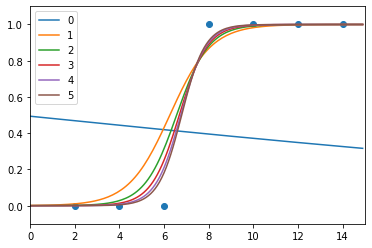

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#공부 시간 X / 합격 여부 Y 데이터 array 만들기
#np.linspace(a, b, t) : [a, b] 에서 균등한 간격으로 t 개의 수로 만들어진 numpy array return
x = np.linspace(2, 14, 7) # x = [ 2.  4.  6.  8. 10. 12. 14.]
y = np.array([0]*3 + [1]*4)

x_data = np.reshape(x, (7, 1)) # x = [[2.], [4.], ... , [14.]]
y_data = np.reshape(y, (7, 1))
data = np.concatenate((x_data, y_data), axis = 1) # data = [[2. 0.], [4. 0.], ... , [14. 1.]]

#기울기 a 와 절편 b 초기화
(a, b) = (0, 0)

#학습률
lr = 0.05

#시그모이드 함수 정의
#sigmoid(a, b, x)로 정의하여 사용할 수 있지만 식이 길지 않아 단일 변수로 정의의
def sigmoid(x):
  return 1/(1+np.e**(-x))

#경사 하강법 실행
#1,000번 반복 마다 각 x 에 대한 현재 a, b 출력
## + 학습 단위 400 마다 그래프 값 저장 후 겹쳐서 그리기 / 변화 추세 확인인
x_range = (np.arange(0, 15, 0.1))
y_arr = np.array([np.empty(150)])

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

for i in range(2001):
  for x, y in data:
    b_diff = (sigmoid(a*x + b) - y)
    a_diff = x * b_diff

    a -= lr*a_diff
    b -= lr*b_diff

    if i%1000 == 0:
      print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

    if i%400 == 0:
      if [x, y] == [2, 0]:
        sig = np.array([sigmoid(a * x + b) for x in x_range])
        if i == 0:
         y_arr = np.array([sig])
        else:
          sig = np.array([sig]) 
          y_arr = np.concatenate((y_arr, sig), axis = 0) # return 할당을 해주지 않아서 애를 먹었음 #

#학습 단위 400 마다 저장한 y 값으로 plot
##위 반복문에서 실행했을 경우, print()가 실행될 때 마다 그래프가 새로 그려지게 되어 중첩된 그림을 그릴 수 없음
for i in range(len(y_arr)):
  plt.plot(x_range, y_arr[i], label ='%.f'%(i))

plt.legend()
plt.show()

학습이 진행됨에 따라 시그모이드 함수의 모양으로 $a$와 $b$가 수렴하는 과정을 볼 수 있다.</br>만약 여기서 입력 값이 추가되어 세 개 이상의 입력 값을 다룬다면 시그모이드 함수가 아니라 **소프트맥스(softmax)**라는 함수를 써야한다.

# 06 장 퍼셉트론 / 07 장 다층 퍼셉트론

- 인공 신경망 Artificial Neural Network, 신경망

신경망의 구조 : 
1. 입력 값이 $x_{1}, x_{2}$ 두 개라고 가정할 때, 입력 변수 각각에 **가중치** $w_{1}, w_{2}$를 곱하고 **편향** $b$를 더한다.
2. 이렇게 더한 값을 **가중합**이라고 부르면, 가중합에 대해 **활성화 함수**를 통하여 출력값을 만들어낸다.
3. 이러한 입력 값과 활성화 함수를 사용해 출력 값을 다음으로 넘기는 가장 작은 신경망 단위를 **퍼셉트론**이라고 부른다. 

- 활성화 함수는 가중합의 결과를 놓고 1 또는 0을 출력해서 다음으로 보낸다.

## XOR 게이트

- OR 진리표

$x_{1}$|$x_{2}$|output
---|---|---
0|0|0
0|1|1
1|0|1
1|1|1

- AND (NAND) 진리표

$x_{1}$|$x_{2}$|output (AND) | output (NAND)
---|---|---|---
0|0|0|1
0|1|0|1
1|0|0|1
1|1|1|0

- XOR 진리표

$x_{1}$|$x_{2}$|output
---|---|---
0|0|0
0|1|1
1|0|1
1|1|0

이전에 Deep-Learning for Scratch 스터디에서 [구현해본 적](https://github.com/tirals88/Deep-Learning-from-Scratch/blob/main/1%EA%B6%8C_2%EC%9E%A5_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0_%2B_3%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D(3%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B9%8C%EC%A7%80).ipynb)이 있어 도움이 되었다.

07 장의 코드 구현은 생략하였다.

# 08 장 오차 역전파

지금까지의 과정에서 가중치를 구하는 방법은 기울기를 구하는 방법과 같다.</br>이는 임의의 가중치를 선언하고 결과 값을 구한 후, 오차의 미분/gradient을 통해 미리 정해놓은 비율만큼 조금씩 이동하여 오차를 줄여나가는 방식이다.

이러한 경사하강법은 단일 퍼셉트론에서는 효율적이지만, 다층 퍼셉트론에서는 연산의 수가 많아지기에 복잡해질 수 있다.

그렇지만 한 단계씩 가중치를 조정하는 방식은 동일하며, 결과 값을 구하는 과정과는 **반대로 입력층이 아닌 출력층에서부터 거슬러 올라가는 방식**이다.</br>이를 **오차 역전파(back propagation)**라고 부른다.

오차 역전파의 계산 방법은 계산 그래프의 특징인 **국소적 계산**이다.</br>국소적 계산은은 해당 노드를 제외한 계산 과정에 대해서는 고려하지 않고 하나의 단순한 계산(미분)에 대해서만 집중하여 전체 과정을 단순화할 수 있다.

보다 자세한 방법과 코드 구현은 이전 Deep-Learning for Scratch [스터디](https://github.com/tirals88/Deep-Learning-from-Scratch/blob/main/1%EA%B6%8C_5%EC%9E%A5_(1)_%EC%98%A4%EC%B0%A8%EC%97%AD%EC%A0%84%ED%8C%8C%EB%B2%95.ipynb)에 있다.



# 09 장 신경망에서 딥러닝으로

오차 역전파는 출력층으로부터 하나씩 앞으로 되돌아가면 각 층의 가중치를 수정해나가는 방식이라고 설명했다. </br>그 과정에서 기울기가 필요했고 층을 늘릴수록 역전파를 통해 전달되는 기울기의 값이 점점 작아져 맨 처음 층까지 전달이 잘 되지 않는 **기울기 소실(vanishing gradient)**문제가 발생하기 시작했다.

## 기울기 소실 문제

위의 05 장에서 시그모이드 함수를 미분한 적이 있다.

$$sig(ax+b) = \frac{1}{1+e^{-(ax+b)}}$$

$$y = sig(x) = \frac{1}{1+e^{-x}} - (1)$$

$$\frac{\partial y}{\partial x} = -\frac{-e^{-x}}{(1 + e^{-x})^2} = \frac{1}{1+e^{-x}}(1-\frac{1}{1+e^{-x}}) = (sig(x))(1-sig(x) - (2)$$

(1), (2) 를 그래프로 표현하면 다음과 같다.

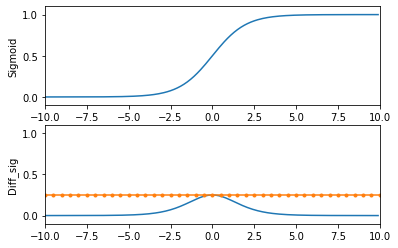

In [69]:
#시그모이드 함수 정의
def sigmoid(x):
  return 1/(1+np.e**(-x))

#시그모이드 미분 함수 정의
def sig_diff(x):
  return sigmoid(x)*(1-sigmoid(x))

x_range = (np.arange(-10, 10, 0.1))
y_arr = np.array([np.empty(200)])

sig = np.array([sigmoid(x) for x in x_range])
sig_diff = np.array([sig_diff(x) for x in x_range])

#미분 최대값값
max_diff = np.max(sig_diff)

sig1 = plt.subplot(2, 1, 1)
plt.xlim(-10, 10)
plt.ylim(-.1, 1.1)
plt.plot(x_range, sig)
plt.ylabel('Sigmoid')

sig2 = plt.subplot(2, 1, 2, sharex=sig1, sharey=sig1)
plt.plot(x_range, sig_diff)
plt.plot(np.arange(-10, 10.5, .5), np.ones(41)*max_diff, '.-')
plt.ylabel('Diff_sig')

plt.show()

시그모이드 함수를 미분하면 최대치가 0.3이며, 1보다 작으므로 반복적인 미분을 하게 되면 0으로 수렴하게 된다.</br>따라서 층을 거칠수록 기울기가 사라져 수정이 어려워진다는 것이 기울기 소실 문제이다.

이를 해결하기 위해 시그모이드 함수가 아닌 여러 함수로 대체할 수 있다.

1. 시그모이드 함수의 범위인 [0, 1]에서 [-1, 1]인, 하이퍼볼릭 탄젠트 $tanh(x)$함수는 미분 값의 범위를 확장 시킬 수 있었지만, 여전히 1이하의 수가 존재해 기울기 소실 문제가 해결되지 않았다.
2. ReLU 함수는 많이 사용된 활성화 함수로 $x$가 0보다 작을 때, 모든 값을 0으로 처리하고, 0보다 클 때 $x$ 그대로 사용하는 방법이다, 따라서 여러 은닉층을 거쳐도 맨 처음 층까지 사라지지 않고 남아있을 수 있다.
3. 이후 softplust 함수 등 렐루의 변형함수도 개발중이며, 좀 더 나은 활성화 함수가 꾸준히 개발되고있다.

## 가중치 업데이트

1. 확률적 경사 하강법(Stochastic Gradient Descent, SGD)
</br>원래의 경사 하강법은 불필요하게 많은 계산량을 요구하지만, SGD 는 전체 데이터가 아닌 랜덤하게 추출한 일부 데이터를 사용하여 더 빠르고 자주 업데이트를 해나가는 방식이다.</br>이 또한 문제가 될 수 있다. 바로 비등방성 함수 (anisotropy function) : **방향에 따라 성질, 즉 여기에서는 기울기가 달라지는 함수**에서 비효율성을 초래할 수 있다.

2. 모멘텀(Momentum)</br>단어 그대로 '관성, 탄력, 가속도'의 의미를 가지고 있는 방식으로 이전에 구했던 기울기의 수정 값과 방향을 참고하여 같은 방향으로 일정한 비율만 수정되게 하는 방법이다. 따라서 지그재그로 일어나는 현상이 줄어들고, 관성을 가지게 된다.</br>이를 수식으로 쓰게 되면 다음과 같다.
$$ v ⬅ αv -η\frac{\partial L}{\partial W}$$
$$ W ⬅ W + v$$

3. 이 외에도 NAG, AdaGrad, RMSProp, Adam 등 추가로 보완된 여러 함수들이 있으며 
이전에 공부했던 Deep-Learning for Scratch [스터디](https://github.com/tirals88/Deep-Learning-from-Scratch/blob/main/1%EA%B6%8C_6%EC%9E%A5_(1)_%ED%95%99%EC%8A%B5_%EA%B4%80%EB%A0%A8_%EA%B8%B0%EC%88%A0%EB%93%A4.ipynb)에 몇 가지 더 구현이 되어있다.